### Data Wranglingn
#### Objectives
 ##### After completing this lab I will be able to:
 *** Handle missing values
 *** Correct data format
 *** Stanndardize adn normalize data

#### What is the purpose of data wrangling?

##### Data wrangling is the process of converting data from the innitial format to a format that may be betteer for analysis

### Import pandas

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [66]:
path = "/Users/robertocandelario/DataGripProjects/Data analysis with python/Data Science Job Salaries/ds_salaries.csv"
df = pd.read_csv(path)

In [67]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [68]:
# Remove the unnamed column. It is useless
df.drop('Unnamed: 0', axis= 1, inplace= True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## How to identify missing values and deal with them?
#### Steps for workign with missing data:
##### 1. Identify missing data
##### 2. Deal with missing data
##### 3. Correct data format

In [69]:
missing_data = df.isnull()

In [70]:
missing_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [71]:
# if anything shows up as true, data is missing
# Let's count the missing values in each column

In [72]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

work_year
False    607
Name: work_year, dtype: int64

experience_level
False    607
Name: experience_level, dtype: int64

employment_type
False    607
Name: employment_type, dtype: int64

job_title
False    607
Name: job_title, dtype: int64

salary
False    607
Name: salary, dtype: int64

salary_currency
False    607
Name: salary_currency, dtype: int64

salary_in_usd
False    607
Name: salary_in_usd, dtype: int64

employee_residence
False    607
Name: employee_residence, dtype: int64

remote_ratio
False    607
Name: remote_ratio, dtype: int64

company_location
False    607
Name: company_location, dtype: int64

company_size
False    607
Name: company_size, dtype: int64



### All columnns show no missing data

### Calculate the mean

In [73]:
avg_salary = df['salary_in_usd'].astype('float').mean(axis=0)
print("Average salarie in USD:", avg_salary)



Average salarie in USD: 112297.86985172982


### what is the experience level?

In [74]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

## Correct data formats

In [75]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [76]:
df[['salary', 'salary_in_usd']] = df[['salary', 'salary_in_usd']].astype("float")
df[['remote_ratio']] = df[['remote_ratio']].astype('float')

In [77]:
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object

## Data normalization
we would liket onormalize those variables so their value ranges from 0 to 1
Approach: replace original value by (original value)/(maximum value)

In [78]:
df['SFC_Salary'] = df['salary_in_usd']/df['salary_in_usd'].max()
df['SFC_Remote_Ratio'] = df['remote_ratio']/df['remote_ratio'].max()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,SFC_Salary,SFC_Remote_Ratio
0,2020,MI,FT,Data Scientist,70000.0,EUR,79833.0,DE,0.0,DE,L,0.133055,0.0
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,260000.0,JP,0.0,JP,S,0.433333,0.0
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,109024.0,GB,50.0,GB,M,0.181707,0.5
3,2020,MI,FT,Product Data Analyst,20000.0,USD,20000.0,HN,0.0,HN,S,0.033333,0.0
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,150000.0,US,50.0,US,L,0.250000,0.5


# Binning
## Why Binning?
#### Binning is a process of tranforming continous numerical variables into discrete categorical "bins" for grouped analysis.
#### We will use the pandas method 'cut' to segment the salary_in_usd column into 3 bins

##### Let's plot the histogram of salary_in_usd to see what the distribution of salary looks like

Text(0.5, 1.0, 'Salary bins')

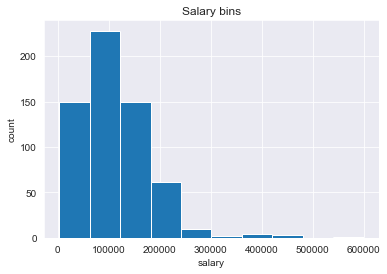

In [79]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['salary_in_usd'])

# set x/y labels and plot title
plt.pyplot.xlabel("salary")
plt.pyplot.ylabel("count")
plt.pyplot.title("Salary bins")

##### We would like 3 bins of equal size bandwidth so we use numpy's linespace(start_value, end_value, number_generated function.
##### since we want to include the minimum value of salary, we want to set start_value = min(df['salary_in_usd'])
##### since we want to include the maximum value of salary, we want to set end_value = max(df['salary_in_ussd'])
##### since we are building 3 binns of equal length, there should be 4 dividers, so numbers_generated = 4

In [80]:
bins = np.linspace(min(df['salary_in_usd']), max(df['salary_in_usd']), 5)
bins

array([  2859.  , 152144.25, 301429.5 , 450714.75, 600000.  ])

#### We set group names

In [81]:
group_names = ['Low', 'Medium', 'High', 'Really High']

#### We apply the function 'cut' to determine what each value of df['salary_in_usd'] belongs to

In [82]:
df['salary_bin'] = pd.cut(df['salary_in_usd'], bins, labels= group_names, include_lowest= True)
df[['salary_in_usd', 'salary_bin']].head(20)

,salary_in_usd,salary_bin
0,79833.0,Low
1,260000.0,Medium
2,109024.0,Low
3,20000.0,Low
4,150000.0,Low
5,72000.0,Low
6,190000.0,Medium
7,35735.0,Low
8,135000.0,Low
9,125000.0,Low


#### Let's see the number of vehicles in each bin:

In [83]:
df['salary_bin'].value_counts()

Low            464
Medium         133
High             9
Really High      1
Name: salary_bin, dtype: int64

#### let's plot the distribution of each bin:

Text(0.5, 1.0, 'salary bins')

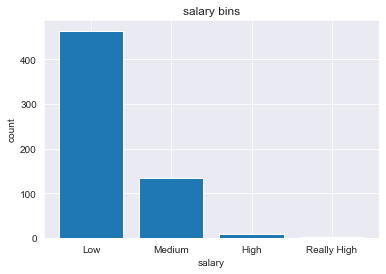

In [84]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["salary_bin"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel('salary')
plt.pyplot.ylabel('count')
plt.pyplot.title('salary bins')

### indicator variable (or Dummy variable)
#### What is a n indicator variable?
##### An ineicator variable (or dummy variable) is a numerical variable used to label categories. They ar called 'dummies' because the numbers themselves don't have inherent meaning.
#### Why we use indicator variables
##### We use indicator variables so we can use categorical variables for regression analysis in later moduels.



In [85]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'SFC_Salary',
       'SFC_Remote_Ratio', 'salary_bin'],
      dtype='object')

In [86]:
# Get the indicator variable and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df["employment_type"])
dummy_variable_1.head()

,CT,FL,FT,PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [87]:
## Rename columns in dummy variable
dummy_variable_1.rename(columns={"CT": "cotract", "FL": "free_lance", "FT": "full_time", "PT": "part_time"}, inplace= True)

In [88]:
dummy_variable_1.head()

,cotract,free_lance,full_time,part_time
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### Merge the df together

In [89]:
df = pd.concat([df, dummy_variable_1], axis= 1)

df.drop("employment_type", axis= 1, inplace= True)

In [90]:
df.head()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,SFC_Salary,SFC_Remote_Ratio,salary_bin,cotract,free_lance,full_time,part_time
0,2020,MI,Data Scientist,70000.0,EUR,79833.0,DE,0.0,DE,L,0.133055,0.0,Low,0,0,1,0
1,2020,SE,Machine Learning Scientist,260000.0,USD,260000.0,JP,0.0,JP,S,0.433333,0.0,Medium,0,0,1,0
2,2020,SE,Big Data Engineer,85000.0,GBP,109024.0,GB,50.0,GB,M,0.181707,0.5,Low,0,0,1,0
3,2020,MI,Product Data Analyst,20000.0,USD,20000.0,HN,0.0,HN,S,0.033333,0.0,Low,0,0,1,0
4,2020,SE,Machine Learning Engineer,150000.0,USD,150000.0,US,50.0,US,L,0.250000,0.5,Low,0,0,1,0


In [91]:
# Save data frame
df.to_csv("ds_salaries_week_2.csv")